In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [14]:
df = pd.read_excel('intelia.xls')


In [15]:
df.drop('MouseID', axis=1, inplace=True)

In [16]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,EGR1_N,H3MeK4_N,CaNA_N,class,Control,Ts65Dn,Memantine,Saline,C/S,S/C
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.131790,0.128186,1.675652,0,1,0,1,0,1,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.135103,0.131119,1.743610,0,1,0,1,0,1,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.133362,0.127431,1.926427,0,1,0,1,0,1,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.147444,0.146901,1.700563,0,1,0,1,0,1,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.140314,0.148380,1.839730,0,1,0,1,0,1,0


In [17]:
X = df.iloc[:,1:77 ]

In [18]:

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [19]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init = 'k-means++', random_state = 100)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

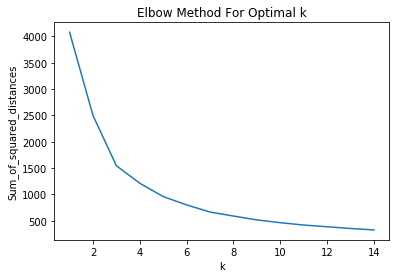

In [20]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [21]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 100)
y_kmeans = km.fit_predict(X)

In [22]:
km.cluster_centers_

array([[ 0.6651381 ,  1.50152285],
       [ 1.26778121, -1.0551484 ],
       [-1.3550978 , -0.14481512]])

In [23]:
km.labels_

array([0, 0, 0, ..., 2, 2, 2])

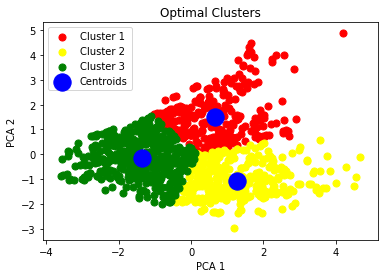

In [24]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Optimal Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()